<a href="https://colab.research.google.com/github/atodev/GoogleCloud/blob/master/RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Description : this program gets BTC's daily simple return

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [30]:
#load the data
import pandas_datareader as web
#Get the stock quote
df = web.DataReader('XRP-USD', data_source='yahoo',start='2020-01-01', end = '2021-12-30')
#Show the data
#df

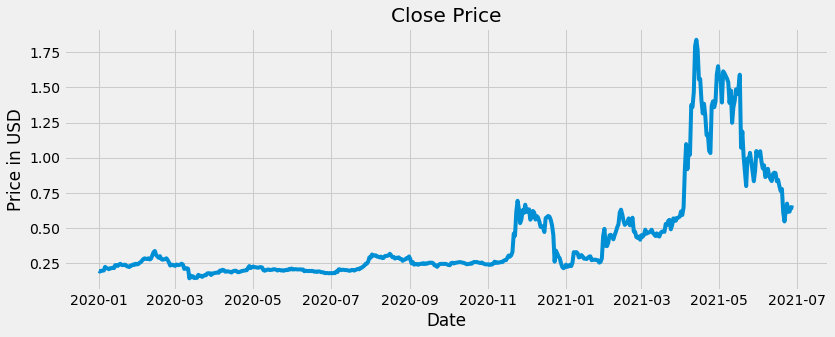

In [31]:
#create and plot the graph
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index, df['Close'],label = 'Close')
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

In [32]:
#Calculate the RSI
delta = df['Close'].diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()
up[up < 0] =0
down[down >0] =0
time_period =14
AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs(down.rolling(window=time_period).mean())
RS = AVG_Gain /AVG_Loss
RSI = 100.0 - (100.0 / (1.0 +RS))

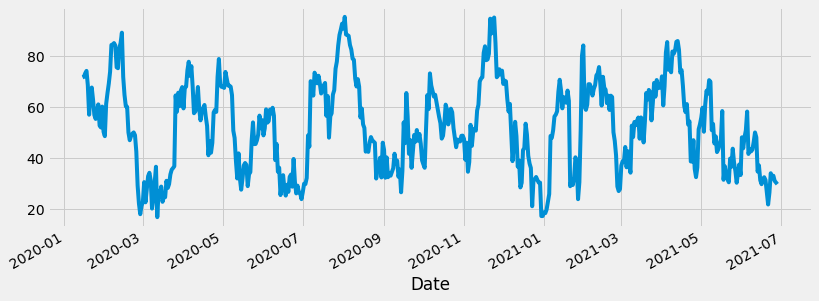

In [33]:
#Plot the RSI
plt.figure(figsize=(12.2,4.5))
RSI.plot()
plt.show()

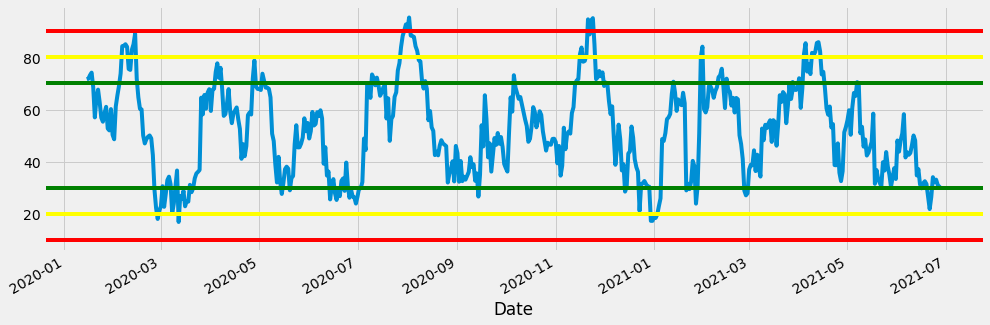

In [34]:
#Plot the RSI with overbought and oversold
fig, ax= plt.subplots(1,1,figsize=(15,5))
ax0 =RSI.plot(ax=ax)
ax0.axhline(30,color='green')
ax0.axhline(70,color='green')
ax0.axhline(20,color='yellow')
ax0.axhline(80,color='yellow')
ax0.axhline(10,color='red')
ax0.axhline(90,color='red')
